In [ ]:
directory = "./dataset/81. academicPhotos/"
for filename in os.listdir(directory):
    if '56010221473194686615_121' in filename:
        break
    img = Image.open(os.path.join(directory, filename))
    img = ImageOps.exif_transpose(img)
    img.save(os.path.join(directory, filename))

In [ ]:
img_path = './dataset/81. academicPhotos/20191028_210237.jpg' # ememes0001943
img_thumbnail = Image.open(img_path)
img_thumbnail.show()
for key, val in img_thumbnail.getexif().items():
    print(key, val)
print()
img_thumbnail = ImageOps.exif_transpose(img_thumbnail)
img_thumbnail.show()
for key, val in img_thumbnail.getexif().items():
    print(key, val)

In [ ]:
# the following is draft text in case we'll split the images (if it's too long), feel free to skip this cell

# Define the size of the smaller images to split the long image into
chunk_size = 1000

# Split the long image into smaller images
chunks = []
for i in range(0, img_thumbnail.height, chunk_size):
    img_remainder = img_thumbnail.height - i//chunk_size * chunk_size
    chunk = img_thumbnail.crop((0, i, img_thumbnail.width, i + min(chunk_size, img_remainder)))
    chunks.append(chunk)

# Process each smaller image and concatenate the recognized text
text = ''
results = []
tot = 0
for chunk in chunks:
    # chunk.show()
    result = ocr.ocr(np.array(chunk), det=True, rec=True, cls=True)
    results.append(result)
    tot += len(result[0])
    # text += '\n'.join([line[1][0] for line in result[0]])
print('total boxes:', tot)
print(text)

In [ ]:
# to do: delete these cells once you're sure of the logic
import keras_ocr # Implemented using CRAFT method
craft_detector = keras_ocr.detection.Detector()
craft_recognizer = keras_ocr.recognition.Recognizer()
tmp_path = './dataset/30. eSocialMedia/eSocialMedia0000003.jpg'
tmp_img_thumbnail = Image.open(tmp_path)
tmp_img_resize = np.array(tmp_img_thumbnail.copy().resize((306,306)))
tmp_img_thumbnail.thumbnail((306,306))
tmp_img_thumbnail = np.array(tmp_img_thumbnail)
res_thumbnail = craft_detector.detect([tmp_img_thumbnail])
resrec_thumbnail = craft_recognizer.recognize(tmp_path)
res_resize = craft_detector.detect([tmp_img_resize])
resrec_resize = craft_recognizer.recognize(tmp_path)

Looking for C:\Users\ashra\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\ashra\.keras-ocr\crnn_kurapan.h5


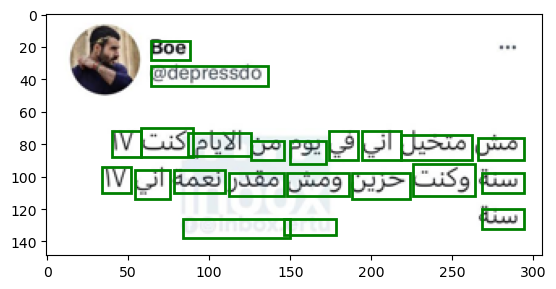

sisns


In [ ]:
for box in res_thumbnail[0]: # single box has 4 lists, each consisting of x,y elements such that the order of the 4 lists: BL, BR, TR, TL
    bottom_left = tuple(box[0].astype('int32'))
    x, y = bottom_left
    top_right = tuple(box[2].astype('int32'))
    w, h = top_right[0] - x, top_right[1] - y
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    # Add the patch to the plot
    plt.gca().add_patch(rect)

# Display the output image
plt.imshow(tmp_img_thumbnail)
plt.show()
print(resrec_thumbnail)


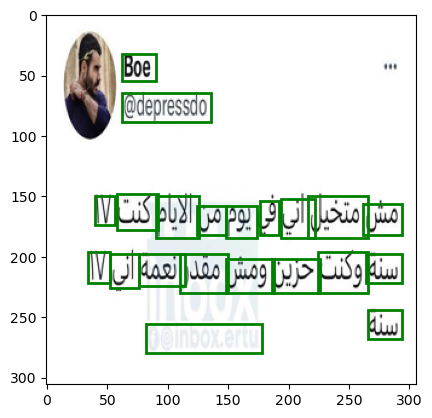

sisns


In [ ]:
for box in res_resize[0]: # single box has 4 lists, each consisting of x,y elements such that the order of the 4 lists: BL, BR, TR, TL
    bottom_left = tuple(box[0].astype('int32'))
    x, y = bottom_left
    top_right = tuple(box[2].astype('int32'))
    w, h = top_right[0] - x, top_right[1] - y
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    # Add the patch to the plot
    plt.gca().add_patch(rect)

# Display the output image
plt.imshow(tmp_img_resize)
plt.show()
print(resrec_resize)


ValueError: too many values to unpack (expected 2)

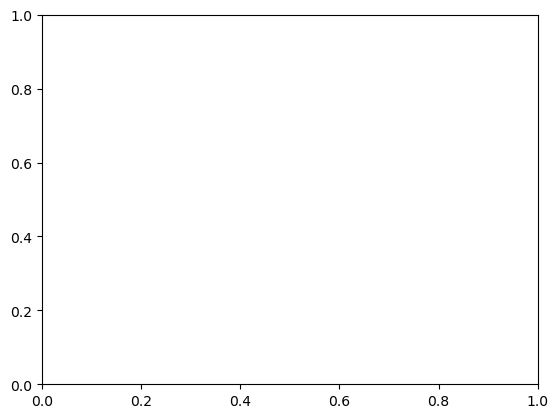

In [ ]:
keras_ocr.tools.drawAnnotations(np.array(Image.open(tmp_path)), predictions=res)